<a href="https://colab.research.google.com/github/puddingHong/Fastcampus/blob/main/%EB%AF%B8%EA%B5%AD%20%EB%8C%80%ED%86%B5%EB%A0%B9%20%EC%84%A0%EA%B1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 미국의 대통령은 어떻게 뽑힐까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 US Election 2020 데이터셋을 사용합니다.
    
    - 총 11개의 파일 중 정보가 가장 많은 2개의 파일을 사용합니다.
    president_county_candidate.csv: 대통령 투표 결과
    governors_county_candidate.csv: 카운티 지사 투표 결과
    
    - 총 1개의 보조 데이터를 이용합니다.
    acs2017_county_data.csv: 카운티별 인구조사 데이터
    
    - 각 파일의 컬럼은 아래와 같습니다.
    state: 주
    county: 카운티(군)
    district: 지구
    candidate: 후보자
    party: 후보자의 소속 정당
    total_votes: 득표 수
    won: 지역 투표 우승 여부
    
    
    
- 데이터 출처: https://www.kaggle.com/unanimad/us-election-2020
- 보조 데이터: https://www.kaggle.com/muonneutrino/us-census-demographic-data

## 최종 목표
    - 보조 데이터셋을 이용하여 데이터셋 보강하는 방법 이해
    - plotly를 이용한 Choropleth 시각화 방법 이해
    - Regression과 Classification의 차이 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터에 관한 사전 배경 지식

### 미국의 선거 제도에 대하여


### 2020 미국 선거 데이터셋 설명


### 2017 미국 인구조사 데이터셋(보조 데이터셋) 설명

## Step 1. 데이터셋 준비하기

- geopandas :   벡터 데이터 작업을 위한 라이브러리(공간 데이터 처리에 유용하게 사용)
- pyshp : shape file을 다루기 위한 라이브러리
- shapely : 평면 형상 처리와 분석
- plotly-geo : 데이터 시각화 툴(=matplotlib)

In [ ]:
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install plotly-geo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [23]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'puddinghong'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d unanimad/us-election-2020
!kaggle datasets download -d muonneutrino/us-census-demographic-data
!unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [80]:
# from US Election 2020
df_pres = pd.read_csv('president_county_candidate.csv')
df_gov = pd.read_csv('governors_county_candidate.csv')

# from US Census 2017
df_census = pd.read_csv('acs2017_county_data.csv')

- pd.read_html('url')[index] :  html페이지에 < table >tag 로 구성된 부분을 가져와 표로 만들어진 목록을 만들어줌   
- 아래 html에는 표가 두 개 있으므로 첫 번째 표를 가져오기 위해 [0]으로 인덱스 번호 지정함


In [81]:
# State Code 관련 부가 자료
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

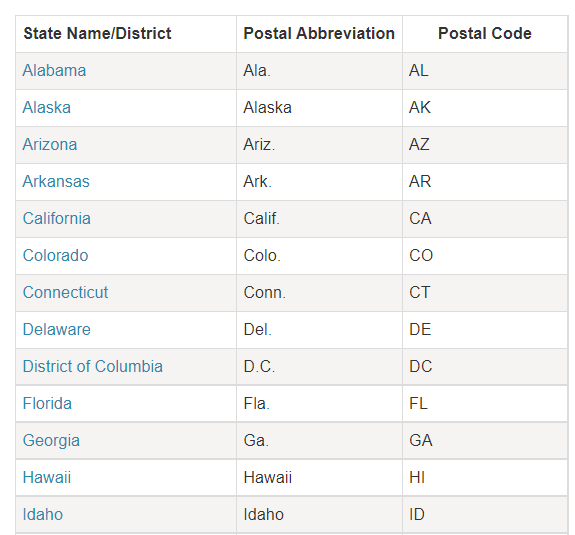

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임 구조 및 기초 통계 확인하기


In [82]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_pres.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


- DEM : 민주당(바이든)   
- REP : 공화당(트럼프)   

In [83]:
# 후보자 확인
# Write_ins는 사람 아님
df_pres['candidate'].unique()

array(['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins',
       ' Write-ins', 'Gloria La Riva', 'Brock Pierce',
       'Rocky De La Fuente', 'Don Blankenship', 'Kanye West',
       'Brian Carroll', 'Ricki Sue King', 'Jade Simmons',
       'President Boddie', 'Bill Hammons', 'Tom Hoefling',
       'Alyson Kennedy', 'Jerome Segal', 'Phil Collins',
       ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter',
       'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic',
       'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber',
       'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon',
       'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro',
       'Joseph Kishore', 'Jordan Scott'], dtype=object)

In [84]:
# 투표수 확인
df_pres.loc[df_pres['candidate']=='Kanye West']['total_votes'].sum()

66367

In [85]:
df_gov.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [86]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


- TotalPop, Men, Women은 실제 수로 기입하여 덧셈 가능   
- Hispanic등 데이터가 소수점인 컬럼은 퍼센트이므로 단순히 더하면 안 됨

In [87]:
df_census['County'].value_counts()

Washington County    30
Jefferson County     25
Franklin County      24
Jackson County       23
Lincoln County       23
                     ..
Nantucket County      1
Hampden County        1
Dukes County          1
Berkshire County      1
Yauco Municipio       1
Name: County, Length: 1955, dtype: int64

큰 county는 잘게 쪼개서 투표함을 알 수 있다.   
ex) LA는 2346개, Hitchcock는 1개

In [88]:
state_code.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


### 문제 5. County 별 통계로 데이터프레임 구조 변경하기


In [89]:
# 모든 데이터프레임의 index를 County로 변경하기

In [90]:
# df_pres에서 관심있는 정당(DEM, REP) 제외하고 제거할 예정
# 관심 정당이면 true, 아니면 false 값을 줌
df_pres['party'].apply(lambda s: str(s) in ['DEM', 'REP'])

0         True
1         True
2        False
3        False
4         True
         ...  
32172    False
32173     True
32174     True
32175    False
32176    False
Name: party, Length: 32177, dtype: bool

In [91]:
# true만 출력
data = df_pres.loc[df_pres['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]

pd.pivot_table(data, values, index, columns, aggfunc=함수)    
 
 - data : 데이터 프레임   
 - values : 분석할 열
 - index   
 - columns   
 - aggfunc : 집계 함수

In [92]:
table_pres = pd.pivot_table(data = data, index=['state', 'county'], columns = 'party', values ='total_votes')
table_pres.rename({'DEM':'Pres_Dem',  'REP':'Pres_Rep'}, axis = 1, inplace = True)
table_pres

party                      Pres_Dem  Pres_Rep
state   county                               
Alabama Autauga County         7503     19838
        Baldwin County        24578     83544
        Barbour County         4816      5622
        Bibb County            1986      7525
        Blount County          2640     24711
...                             ...       ...
Wyoming Sweetwater County      3823     12229
        Teton County           9848      4341
        Uinta County           1591      7496
        Washakie County         651      3245
        Weston County           360      3107

[4633 rows x 2 columns]

자료 수정 후에는 항상 결측치를 확인해야 한다.   

In [93]:
table_pres.isna().sum()

party
Pres_Dem    0
Pres_Rep    0
dtype: int64

In [94]:
data = df_gov.loc[df_gov['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_gov = pd.pivot_table(data = data, index=['state', 'county'], columns = 'party', values ='votes')
table_gov.rename({'DEM':'Gov_Dem',  'REP':'Gov_Rep'}, axis = 1, inplace = True)

print(table_gov)
print(table_gov.isna().sum())

party                            Gov_Dem  Gov_Rep
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]
party
Gov_Dem    0
Gov_Rep    0
dtype: int64


In [95]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


df_census는 이미 state와 county로 나눠져있어 피벗테이블 생성하지 않아도 된다.   
대신 이전 데이터 프레임들과 컬럼 명을 맞춰야 해서 state와 county를 모두 소문자로 바꿔준다.  

In [96]:
df_census.rename({'State':'state', 'County':'county'}, axis = 1, inplace = True)
df_census.drop('CountyId', axis = 1, inplace = True)
df_census.set_index(['state', 'county'], inplace = True)
df_census.head()

TotalPop    Men  ...  FamilyWork  Unemployment
state   county                           ...                          
Alabama Autauga County     55036  26899  ...         0.1           5.2
        Baldwin County    203360  99527  ...         0.1           5.5
        Barbour County     26201  13976  ...         0.3          12.4
        Bibb County        22580  12251  ...         0.3           8.2
        Blount County      57667  28490  ...         0.1           4.9

[5 rows x 34 columns]

In [97]:
# 불필요한 컬럼 드랍
df_census.columns

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [98]:
df_census.drop(['Income','IncomePerCapErr', 'IncomeErr'], axis = 1, inplace = True)

men, women은 total pop으로 나눠야 함   
사람 수가 많으면 men, women이 많으므로 멀티 코~ 생길 수 있음   
성비 형태로 바꾸는 것이 나음   
voting age citizen과 employed도 해당

In [99]:
df_census.drop('Women', axis = 1, inplace = True)

/= 는 복합연산자

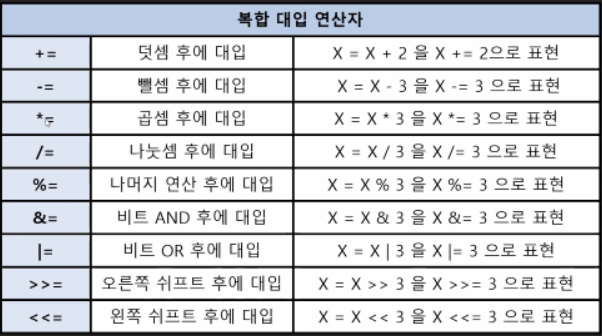

In [100]:
test = [{'a' : 1, 'b' : 2}, {'a' : 2, 'b' : 2}]
df_test = pd.DataFrame (data = test)
df_test

,a,b
0,1,2
1,2,2


In [101]:
test1 = df_test['a'] / df_test['b']
test1

0    0.5
1    1.0
dtype: float64

In [102]:
df_census['Men'] /= df_census['TotalPop']

In [103]:
df_census['VotingAgeCitizen'] /= df_census['TotalPop']

In [104]:
df_census['Employed'] /= df_census['TotalPop']

In [105]:
# Men, VotingAgeCitizen, Employed 확인
df_census.head()

TotalPop       Men  ...  FamilyWork  Unemployment
state   county                              ...                          
Alabama Autauga County     55036  0.488753  ...         0.1           5.2
        Baldwin County    203360  0.489413  ...         0.1           5.5
        Barbour County     26201  0.533415  ...         0.3          12.4
        Bibb County        22580  0.542560  ...         0.3           8.2
        Blount County      57667  0.494043  ...         0.1           4.9

[5 rows x 30 columns]

### 문제 6. 여러 데이터프레임을 하나의 데이터프레임으로 결합하기

In [106]:
# df_pres, df_gov, df_census 데이터프레임을 하나로 결합하기
df = pd.concat([table_pres, table_gov, df_census], axis = 1)
df

Pres_Dem  Pres_Rep  ...  FamilyWork  Unemployment
state   county                                 ...                          
Alabama Autauga County       7503.0   19838.0  ...         0.1           5.2
        Baldwin County      24578.0   83544.0  ...         0.1           5.5
        Barbour County       4816.0    5622.0  ...         0.3          12.4
        Bibb County          1986.0    7525.0  ...         0.3           8.2
        Blount County        2640.0   24711.0  ...         0.1           4.9
...                             ...       ...  ...         ...           ...
Wyoming Sweetwater County    3823.0   12229.0  ...         0.0           5.2
        Teton County         9848.0    4341.0  ...         0.0           1.3
        Uinta County         1591.0    7496.0  ...         0.4           6.4
        Washakie County       651.0    3245.0  ...         0.2           6.1
        Weston County         360.0    3107.0  ...         1.1           2.2

[4809 rows x 34 columns]

### 문제 7. 컬럼간의 Correlation을 Heatmap으로 표현하기


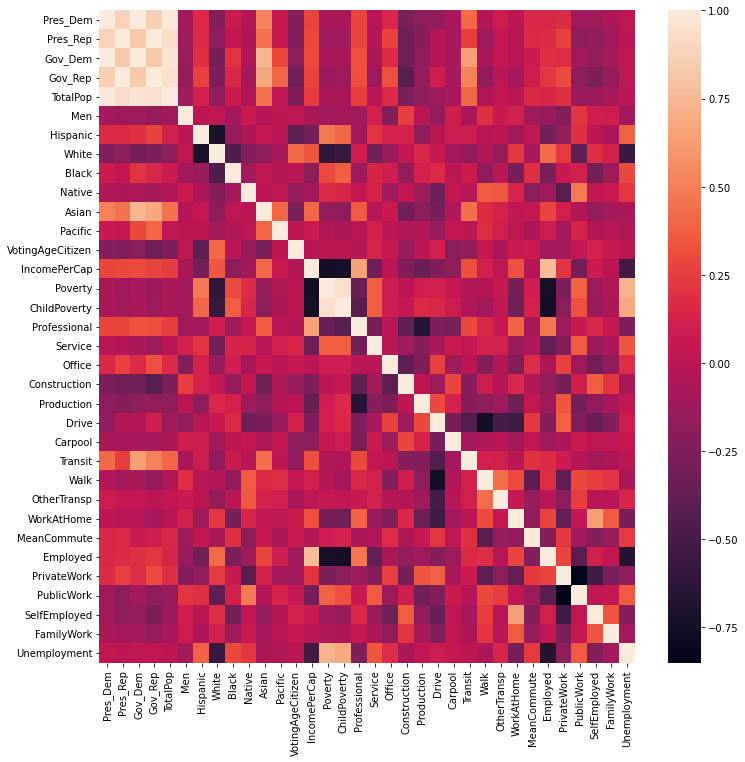

In [107]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize =  (12, 12))
sns.heatmap(df.corr())

각 정당 투표에 대한 corr 분석을 위해 필요한 컬럼만 남김

In [110]:
df.columns

Index(['Pres_Dem', 'Pres_Rep', 'Gov_Dem', 'Gov_Rep', 'TotalPop', 'Men',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

AxesSubplot(0.125,0.125;0.62x0.755)
AxesSubplot(0.125,0.125;0.62x0.755)


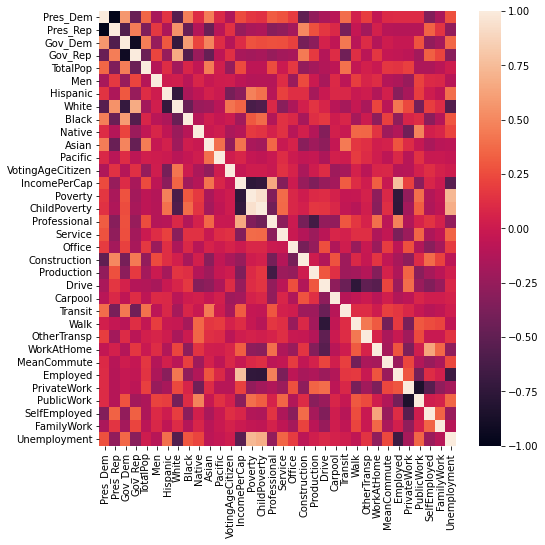

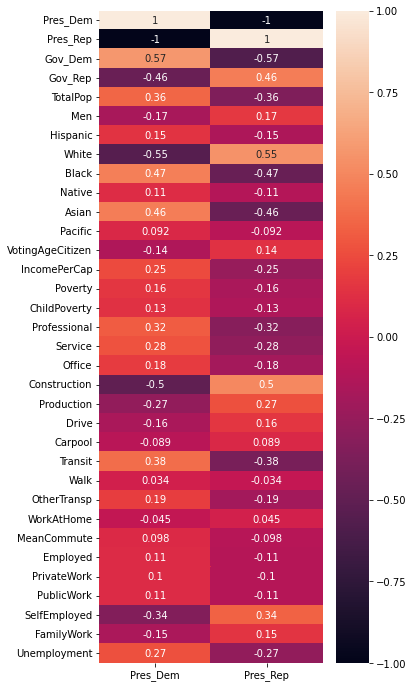

In [119]:
plt.figure(figsize =  (8, 8))
print(sns.heatmap(df_norm.corr()))

plt.figure(figsize = (5, 12))
print(sns.heatmap(df_norm.corr()[['Pres_Dem', 'Pres_Rep']], annot = True))

corr 높은 컬럼을 보면   
- Asian 은 전체적으로 수치가 높다. 이는 전체적으로 투표율이 높다는 뜻이다.   
- Transit 은 Dem(민주당) 투표율이 높다.   
- 상단에 수치가 높은 부분은 전처리가 부족한 부분이다. county 별로 보고있기에 인구가 많으면 투표수가 높을 수밖에 없다.

In [112]:
# 복사본 생성
df_norm = df.copy()

In [115]:
# 비율로 변경
df_norm['Pres_Dem'] /= df['Pres_Dem'] + df['Pres_Rep']
df_norm['Pres_Rep'] /= df['Pres_Dem'] + df['Pres_Rep']
df_norm['Gov_Dem'] /= df['Pres_Dem'] + df['Pres_Rep']
df_norm['Gov_Rep'] /= df['Pres_Dem'] + df['Pres_Rep']

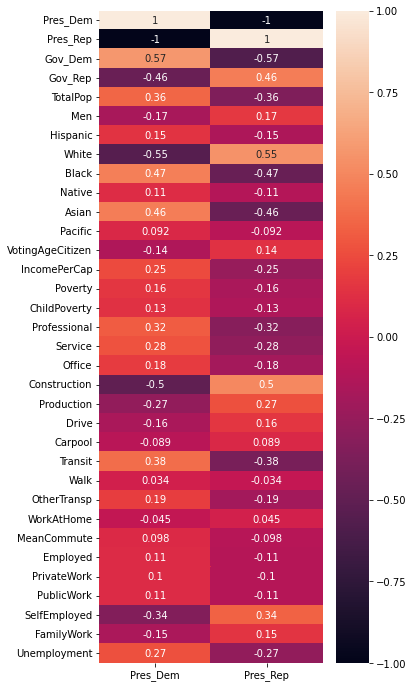

In [116]:
plt.figure(figsize = (5, 12))
sns.heatmap(df_norm.corr()[['Pres_Dem', 'Pres_Rep']], annot = True)

- 인구수가 많으면 민주당에 투표하는 경향이 있음   
- 백인들은 공화당에 투표율이 높음(트럼프가 백인 우월주의)    
- 흑인, 아시안들은 민주당에 투표율 높음(인종차별 때문)
- 전문직은 민주당 투표율이 높음 
- 건설직은 공화당 투표율이 높음
- 실업률이 높을수록 민주당 투표함

### 문제 8. Seaborn을 이용하여 연관성 높은 데이터의 Jointplot 확인

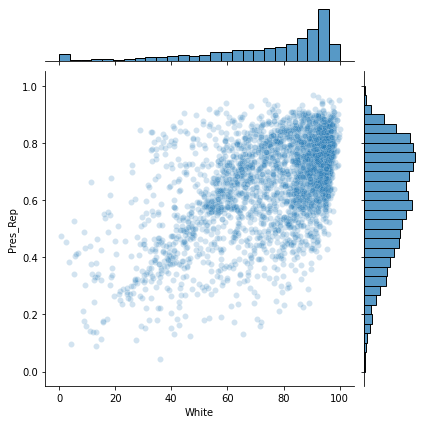

In [121]:
sns.jointplot(x='White', y = 'Pres_Rep', data = df_norm, alpha = 0.2)

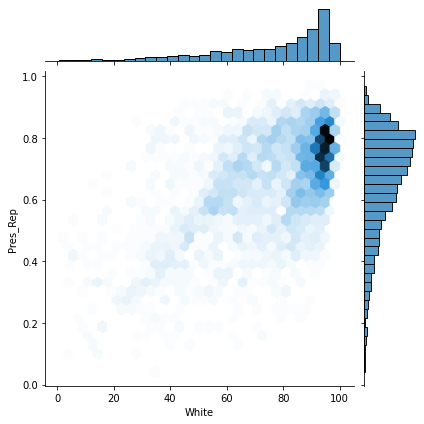

In [122]:
sns.jointplot(x='White', y = 'Pres_Rep', data = df_norm, kind = 'hex')

대체적으로 백인이 많을수록 공화당 투표율이 올라가지만 무조건적인 건 아님.   
살짝 밑으로 늘어지는 형태가 나타남.   
그 이유를 살펴보자면

먼저 공화당 투표율이 높았던 전문직을 hue로 두고 jointplot을 봤다.

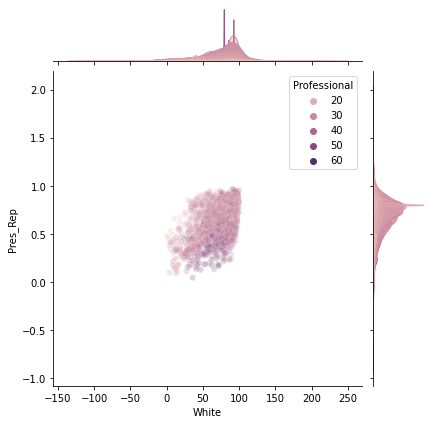

In [123]:
sns.jointplot(x='White', y = 'Pres_Rep', hue = 'Professional', data = df_norm, alpha = 0.2)

대체적으로 백인이 많을수록 투표율이 높아지긴 하지만 단순히 전문직 백인이 많다고 투표율이 높아지는 게 아님

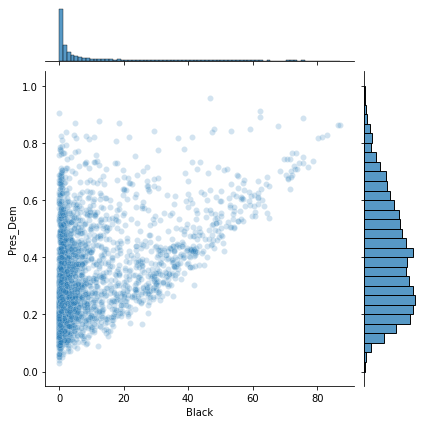

In [125]:
sns.jointplot(x='Black', y = 'Pres_Dem', data = df_norm, alpha = 0.2)

전체적으로 흑인 비율이 높을수록 민주당 투표율이 높다.   
흑인 비율이 낮더라도 투표율이 낮지 않다.   
흑인 비율이 높은 county가 별로 없어서 x축이 커질수록 표본이 적게 나타난다.
다른 요인도 고려해봐야할 것 같다.

## Step 3. Plotly를 이용하여 데이터 시각화하기


### 문제 9. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [ ]:
import plotly.figure_factory as ff

# FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# Color Scale 세팅
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

In [ ]:
# ff.create_choropleth()에서 사용할 수 있도록 데이터프레임 정리하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa








### 문제 10. Choropleth map 시각화하기

In [ ]:
# ff.create_choropleth() 메소드를 이용하여 Choropleth 플랏하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa

fig = ff.create_choropleth(...)



fig.layout.template = None
fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 학습을 위한 데이터프레임 구성하기

In [ ]:
# 투표 결과에 해당하는 데이터는 입력 데이터에서 제거한다.
# 예측 타겟은 DEM vs. REP 투표 비율로 한다.

X =
y =

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler =
X = 



### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

### 문제 14. PCA를 이용해 데이터 전처리 수행하기

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# PCA를 이용해 Dimensionality Reduction 수행하기
pca =






## Step 4. Regression 모델 학습하기

### 문제 15. LightGBM Regression 모델 학습하기

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# XGBRegressor 모델 생성/학습. Feature에 PCA 적용하기
model_reg = 




### 문제 16. Regression 모델 정확도 출력하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, mean_squared_error, classification_report 결과 출력하기
pred = 





## Step 5. Classification 모델 학습하기


### 문제 17. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_cls = 





### 문제 18. Classifier의 Feature Importance 시각화하기


In [ ]:
# XGBClassifier 모델의 feature_importances_ 속성 시각화





### 문제 19. Classifier 모델 정확도 출력하기

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 



